#### Import library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OneHotEncoder,OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings("ignore")

### Import data

In [2]:
df = pd.read_csv("car_price.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


### Checking null values

In [3]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [4]:
df.isnull().mean()*100

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.718996
engine           2.718996
max_power        2.645177
torque           2.731299
seats            2.718996
dtype: float64

### Drop null values CCA

In [5]:
df.dropna(inplace=True)

### Drop duplicates

In [6]:
df.duplicated().sum()

1189

In [7]:
df.drop_duplicates(inplace=True)

#### Informations about the columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   object 
 10  max_power      6717 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 734.7+ KB


#### Convert the columns for that compatible for model

In [9]:
df["mileage"]=df["mileage"].str.split().str[0].str.strip().astype(float)

In [10]:
df["engine"]=df["engine"].str.split().str[0].str.strip().astype(int)


In [11]:
df["max_power"]=df["max_power"].str.split().str[0].str.strip().astype(float)

In [12]:
df.drop(columns=["torque"],inplace=True)

In [13]:
df["name"]=df["name"].str.split().str[0].str.strip()

In [14]:
df["seats"] = df["seats"].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   int32  
 10  max_power      6717 non-null   float64
 11  seats          6717 non-null   int32  
dtypes: float64(2), int32(2), int64(3), object(5)
memory usage: 629.7+ KB


#### Seperate the numerical and categorical columns

In [16]:
num =[]
cat =[]
for col in df.columns:
    if df[col].dtypes=="O":
        cat.append(col)
    else:
        num.append(col)

In [17]:
num

['year',
 'selling_price',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats']

In [18]:
cat

['name', 'fuel', 'seller_type', 'transmission', 'owner']

#### See the distribution of data

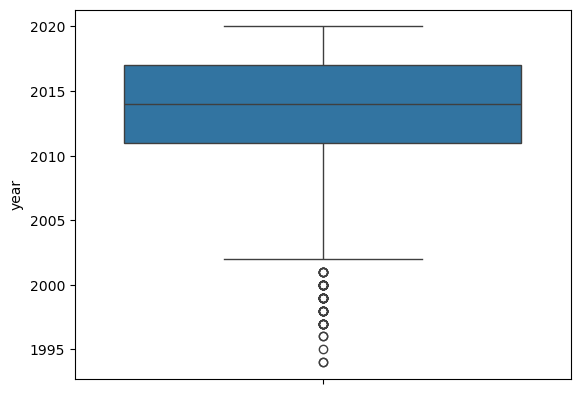

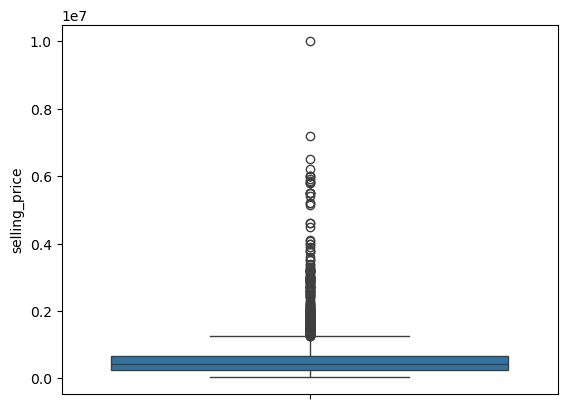

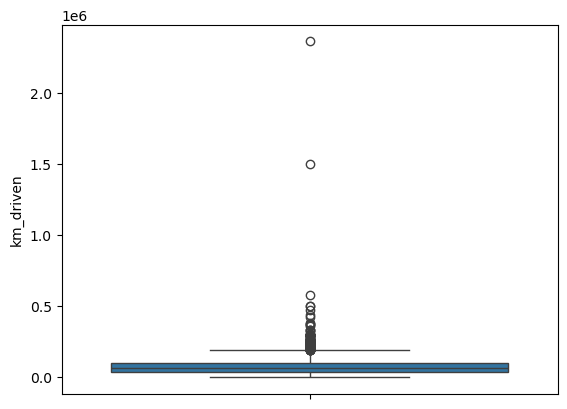

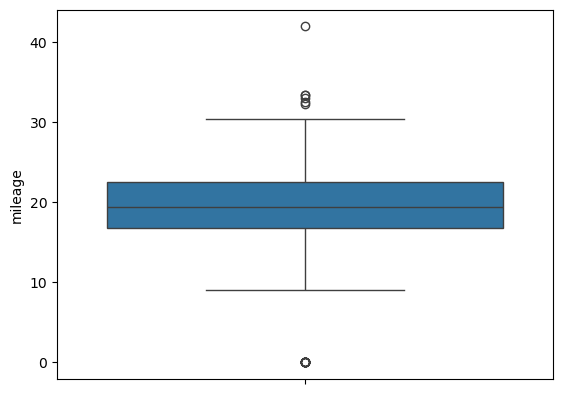

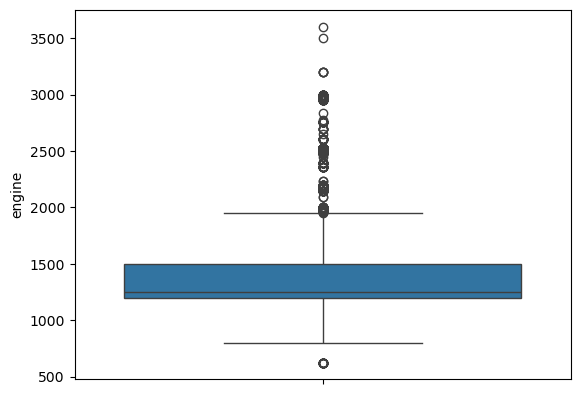

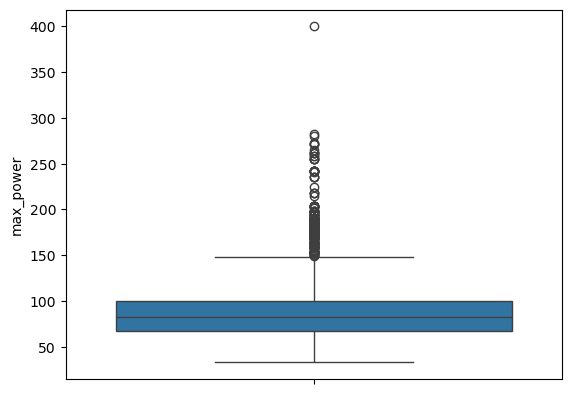

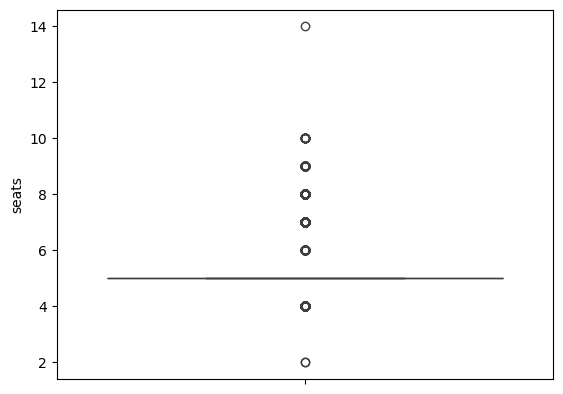

In [19]:
for col in num:
    sns.boxplot(df[col])
    plt.show()

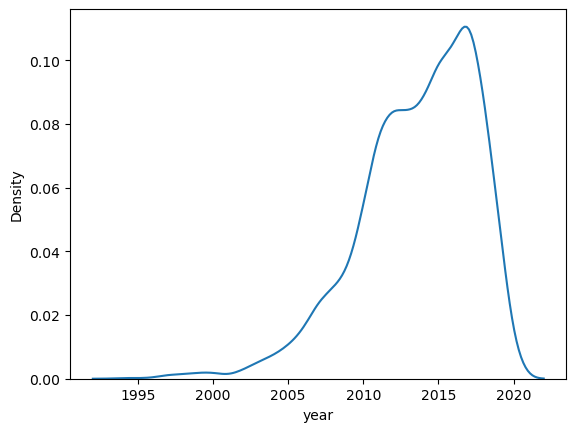

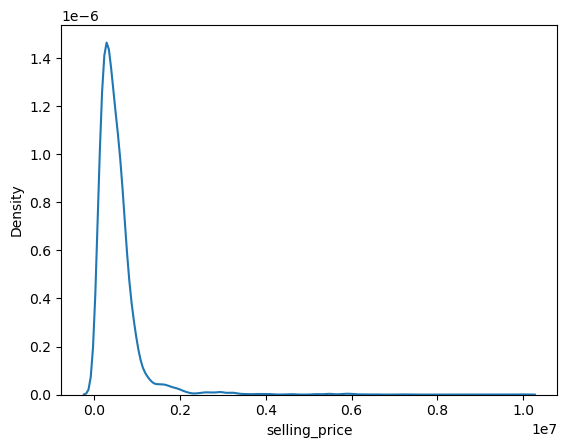

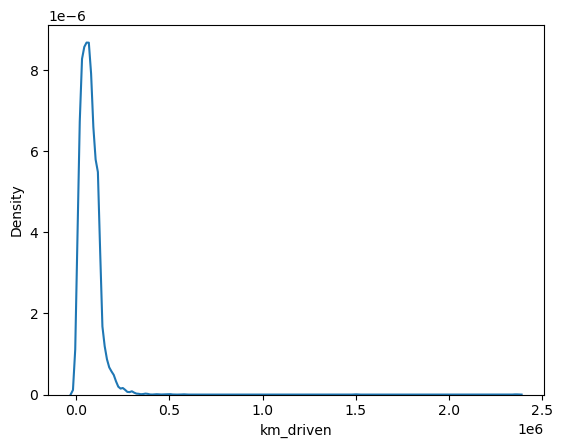

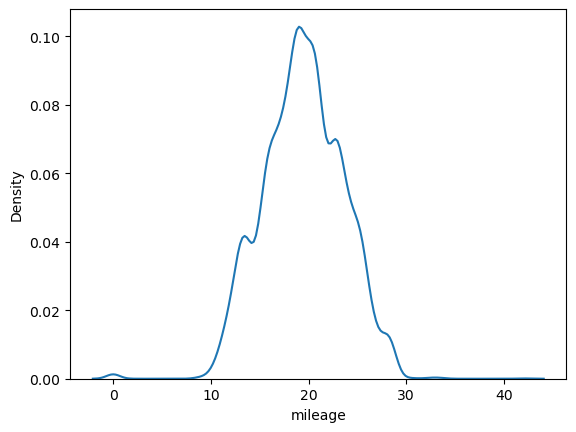

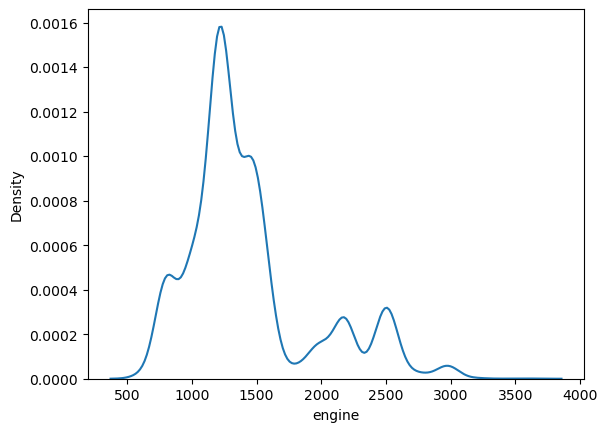

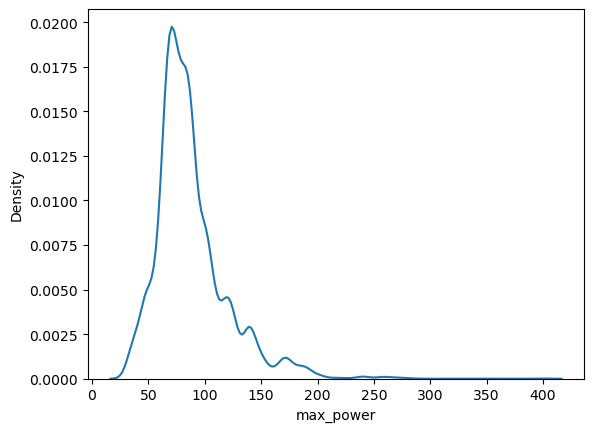

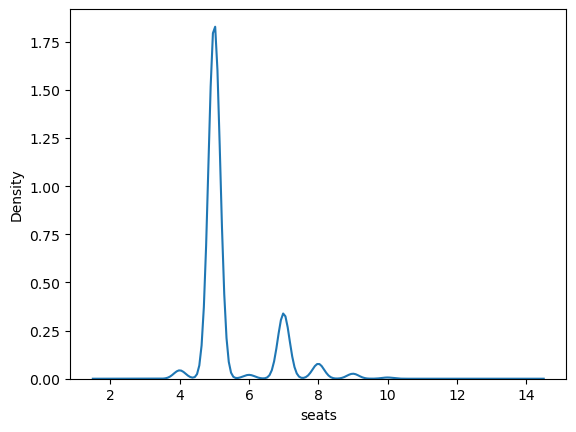

In [20]:
for col in num:
    sns.kdeplot(df[col])
    plt.show()

#### Correlation between inpurt features and target feature

In [21]:
heat_map=df[num].corr()
heat_map

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427335,-0.387918,0.366048,-0.019763,0.159889,0.025021
selling_price,0.427335,1.000000,-0.161265,-0.108655,0.442772,0.692323,0.158531
km_driven,-0.387918,-0.161265,1.000000,-0.196419,0.253460,0.041770,0.207890
mileage,0.366048,-0.108655,-0.196419,1.000000,-0.579153,-0.378609,-0.459188
engine,-0.019763,0.442772,0.253460,-0.579153,1.000000,0.683506,0.658711
max_power,0.159889,0.692323,0.041770,-0.378609,0.683506,1.000000,0.259028
seats,0.025021,0.158531,0.207890,-0.459188,0.658711,0.259028,1.000000


<Axes: >

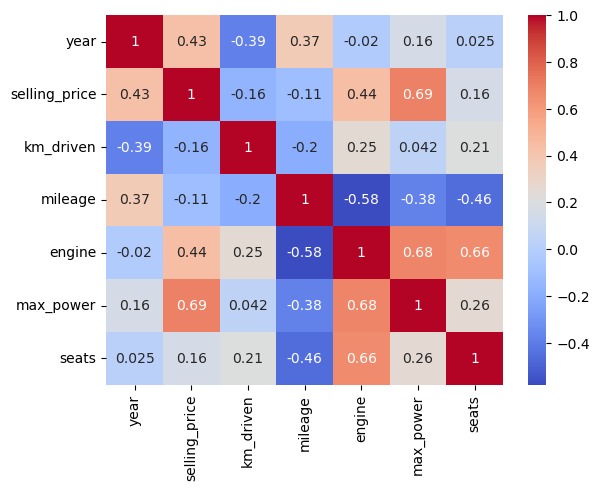

In [22]:
sns.heatmap(heat_map,annot=True,cmap="coolwarm")

#### Seperate traning data and testing data

In [23]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=["selling_price"]),df["selling_price"],test_size=0.2,random_state=42)

In [24]:
x_train

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
2583,Hyundai,2014,80000,Petrol,Individual,Manual,First Owner,19.10,1197,82.00,5
1428,Ford,2017,35000,Diesel,Individual,Manual,First Owner,25.83,1498,99.00,5
7288,Hyundai,2013,64000,Diesel,Dealer,Automatic,First Owner,14.62,1498,113.42,5
6851,Maruti,2018,25000,Diesel,Individual,Manual,First Owner,28.40,1248,74.02,5
4447,Maruti,2013,90000,Diesel,Individual,Manual,First Owner,22.90,1248,74.00,5
...,...,...,...,...,...,...,...,...,...,...,...
4475,Maruti,2011,40000,Petrol,Individual,Manual,Second Owner,20.92,998,67.10,5
6224,Maruti,2015,80000,Diesel,Individual,Manual,First Owner,20.77,1248,88.80,7
6268,Maruti,2019,14548,Petrol,Dealer,Manual,First Owner,21.21,1197,81.80,5
6450,Honda,2014,100000,Diesel,Individual,Manual,Second Owner,26.00,1498,98.60,5


#### Make columntransformer for data preprocessing

In [25]:
transformer = ColumnTransformer([
    ("tf1",OneHotEncoder(sparse_output=False,handle_unknown="ignore"),[0,3,4]),
    ("tf2",OrdinalEncoder(categories=[["Manual","Automatic"],["Test Drive Car","Fourth & Above Owner","Third Owner","Second Owner","First Owner"]]),[5,6])
],remainder="passthrough")

In [26]:
x_train_final = transformer.fit_transform(x_train)
x_test_final = transformer.transform(x_test)

In [27]:
x_test_final.shape

(1344, 46)

#### Use randomforest

In [28]:
forest = RandomForestRegressor(max_depth=12,min_samples_leaf=2, min_samples_split=5)

In [29]:
forest.fit(x_train_final,y_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=2, min_samples_split=5)

#### Check the performace using cross val score

In [30]:
cv_scores = cross_val_score(forest,x_train_final, y_train, cv=5, scoring='r2')

In [31]:
print("Cross-Validation R² Scores:", cv_scores)
print("Mean R² Score:", np.mean(cv_scores))

Cross-Validation R² Scores: [0.9152572  0.8663516  0.90363311 0.85124817 0.91036988]
Mean R² Score: 0.8893719929501225


In [32]:
y_pred = forest.predict(x_test_final)

In [33]:
print(r2_score(y_test,y_pred)*100)

92.73312843707471


#### Grid search cv for optimal hyperparameter tuning

In [34]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6,8,10,12],
    'min_samples_split': [2, 5, 10,12,14],
    'min_samples_leaf': [1, 2, 4,5,7,8]
}
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train_final,y_train)

# Display Best Parameters and Score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best R² Score: 0.8949369051608409


In [35]:
y_pred2 = forest.predict(x_train_final)

In [36]:
print(r2_score(y_train,y_pred2)*100)

96.16313794174161


#### To know about the feature importance

In [37]:
ohe_features = transformer.named_transformers_['tf1'].get_feature_names_out()
ordinal_features = transformer.named_transformers_["tf2"].get_feature_names_out()
numerical_features = ["year", "km_driven", "mileage", "engine", "max_power", "seats"]
all_features = np.concatenate([ohe_features, ordinal_features, numerical_features])
all_features.shape



(46,)

In [39]:
df_filtered = feature_importance[~feature_importance["feature_name"].str.startswith(("name", "fuel", "seller_type"))]


In [40]:
df_filtered

,feature_name,feature_importance
38,transmission,0.005906
39,owner,0.002819
40,year,0.247763
41,km_driven,0.051424
42,mileage,0.019003
43,engine,0.026946
44,max_power,0.607147
45,seats,0.008614


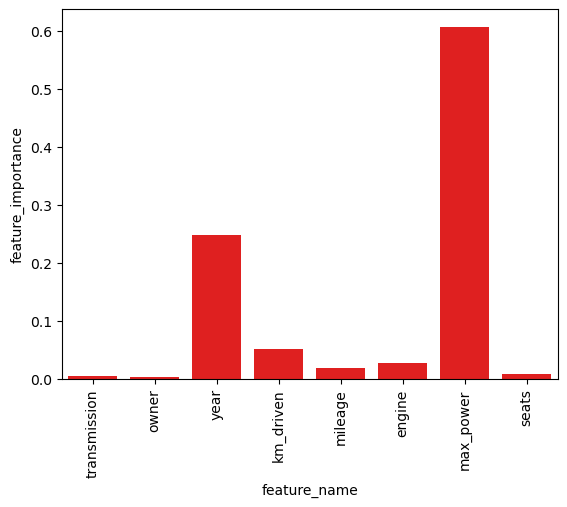

In [41]:
sns.barplot(x=df_filtered["feature_name"], y=df_filtered["feature_importance"], color="red")
plt.xticks(rotation=90)
plt.show()


In [42]:
car_company_importance=feature_importance[feature_importance["feature_name"].str.startswith("name")].sort_values(by="feature_importance",ascending=False).head(15)

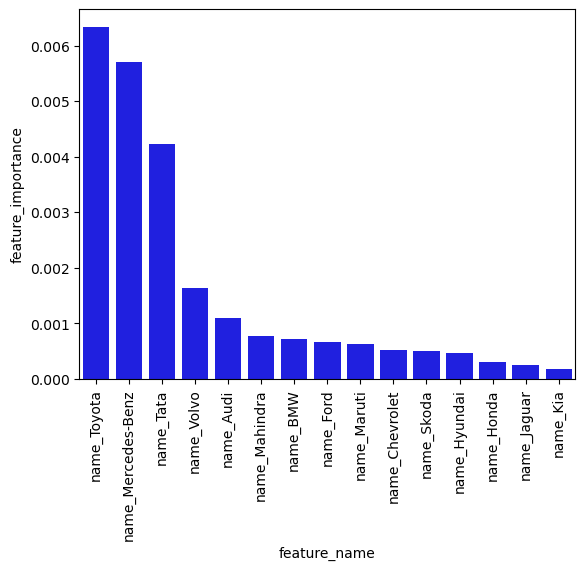

In [43]:
sns.barplot(x=car_company_importance["feature_name"],y=car_company_importance["feature_importance"],color="blue")
plt.xticks(rotation=90)
plt.show()

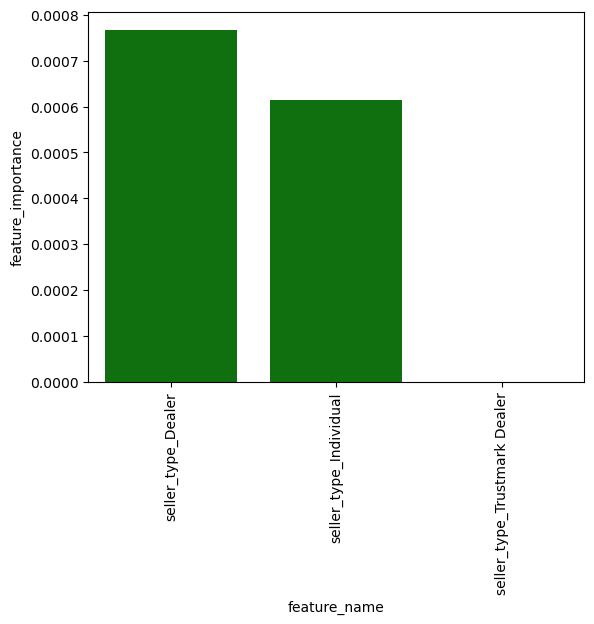

In [49]:
dealer_=feature_importance[feature_importance["feature_name"].str.startswith("seller")]
sns.barplot(x=dealter_["feature_name"],y=dealer_["feature_importance"],color="green")
plt.xticks(rotation=90)
plt.show()

In [45]:
fuel=feature_importance[feature_importance["feature_name"].str.startswith("fuel")]

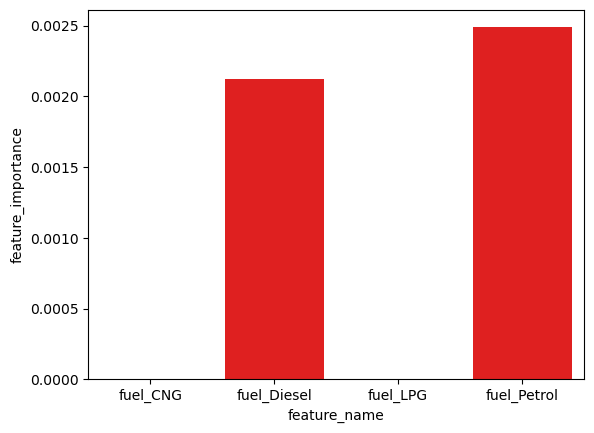

In [50]:
sns.barplot(x=fuel["feature_name"],y=fuel["feature_importance"],color="red")
plt.show()

<Axes: xlabel='name'>

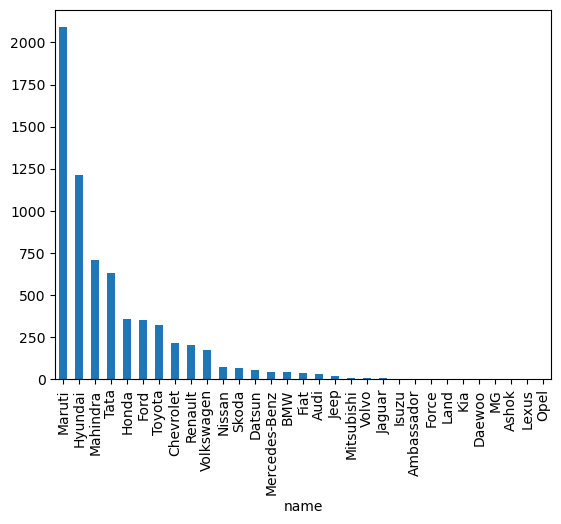

In [52]:
df["name"].value_counts().plot(kind="bar")

In [53]:
df[df["name"]=="Toyota"]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
8,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364,67.10,5
47,Toyota,2014,1500000,77000,Diesel,Dealer,Manual,First Owner,12.55,2982,168.50,7
48,Toyota,2013,700000,99000,Diesel,Dealer,Manual,First Owner,12.99,2494,100.00,7
55,Toyota,2016,1650000,127700,Diesel,Dealer,Automatic,Second Owner,11.36,2755,171.50,7
56,Toyota,2016,950000,99000,Diesel,Dealer,Manual,First Owner,12.99,2494,100.60,7
...,...,...,...,...,...,...,...,...,...,...,...,...
7949,Toyota,2015,1400000,170000,Diesel,Individual,Manual,First Owner,12.99,2494,100.60,7
8071,Toyota,2010,425000,200000,Diesel,Individual,Manual,Second Owner,12.80,2494,102.00,7
8077,Toyota,2009,550000,250000,Diesel,Individual,Manual,First Owner,12.80,2494,102.00,7
8111,Toyota,2014,425000,50000,Diesel,Individual,Manual,First Owner,23.59,1364,67.06,5


In [55]:
df[df["name"]=="Mercedes-Benz"]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
49,Mercedes-Benz,2014,1450000,27800,Diesel,Dealer,Automatic,Second Owner,14.80,2143,120.70,5
60,Mercedes-Benz,2013,1425000,59000,Diesel,Dealer,Automatic,First Owner,14.84,2143,170.00,5
136,Mercedes-Benz,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.50,2987,254.79,5
141,Mercedes-Benz,2016,2700000,35000,Diesel,Dealer,Automatic,First Owner,15.00,2143,204.00,5
148,Mercedes-Benz,2017,5850000,47000,Diesel,Dealer,Automatic,First Owner,13.50,2987,282.00,5
156,Mercedes-Benz,2018,2550000,18000,Petrol,Dealer,Automatic,First Owner,15.04,1991,183.00,5
158,Mercedes-Benz,2017,2700000,16000,Petrol,Dealer,Automatic,First Owner,14.74,1991,181.04,5
288,Mercedes-Benz,2018,4600000,7976,Diesel,Individual,Automatic,First Owner,17.90,2143,170.00,5
362,Mercedes-Benz,2013,1550000,25000,Diesel,Individual,Automatic,First Owner,14.84,2143,170.00,5
681,Mercedes-Benz,2016,3000000,40000,Diesel,Individual,Automatic,First Owner,13.00,2143,204.00,5


# Thankyou!